In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
#loading our dataset into a pandas DataFrame

trainfile = '/content/drive/MyDrive/IDS/KDDTrain+.txt'
testfile = '/content/drive/MyDrive/IDS/KDDTest+.txt'

col_names = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df_train = pd.read_csv(trainfile,header=None, names = col_names)

df_test = pd.read_csv(testfile, header=None, names = col_names)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Displaying the first few rows of the 'df' DataFrame to inspect its initial data entries
pd.set_option('display.max_columns', None)
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)


In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(148517, 43)

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.0,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,0.001508,0.000976,0.273726,0.012073,0.000525,0.004013,0.0,0.000081,0.012308,83.336561,28.251937,0.256925,0.255337,0.137947,0.138487,0.672983,0.067761,0.097441,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,0.038807,0.042389,22.689023,0.517863,0.027701,0.095257,0.0,0.008988,0.110259,116.760741,75.369635,0.431918,0.432578,0.339387,0.341783,0.436544,0.194666,0.258886,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,141.000000,17.000000,0.850000,0.910000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,100.000000,5.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
# Output a summary of information about the DataFrame 'df,' including data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
## Counting the number of unique values in each categorical (object) column
df.select_dtypes('object').nunique()

protocol_type     3
service          70
flag             11
attack           40
dtype: int64

In [ ]:
## Counting the number of unique values in each categorical (object) column
df.select_dtypes(['int', 'float']).nunique()

duration                        3424
src_bytes                       3601
dst_bytes                      10401
land                               2
wrong_fragment                     3
urgent                             4
hot                               29
num_failed_logins                  6
logged_in                          2
num_compromised                   96
root_shell                         2
su_attempted                       3
num_root                          91
num_file_creations                36
num_shells                         4
num_access_files                  10
num_outbound_cmds                  1
is_host_login                      2
is_guest_login                     2
count                            512
srv_count                        512
serror_rate                       99
srv_serror_rate                   94
rerror_rate                       98
srv_rerror_rate                   95
same_srv_rate                    101
diff_srv_rate                    101
s

In [ ]:
## Counting the number of unique values in each categorical (object) column
df.select_dtypes('object').nunique()

protocol_type     3
service          70
flag             11
attack           40
dtype: int64

In [ ]:
## Counting the number of unique values in each categorical (object) column
df.select_dtypes(['int', 'float']).nunique()

duration                        3424
src_bytes                       3601
dst_bytes                      10401
land                               2
wrong_fragment                     3
urgent                             4
hot                               29
num_failed_logins                  6
logged_in                          2
num_compromised                   96
root_shell                         2
su_attempted                       3
num_root                          91
num_file_creations                36
num_shells                         4
num_access_files                  10
num_outbound_cmds                  1
is_host_login                      2
is_guest_login                     2
count                            512
srv_count                        512
serror_rate                       99
srv_serror_rate                   94
rerror_rate                       98
srv_rerror_rate                   95
same_srv_rate                    101
diff_srv_rate                    101
s

In [ ]:
df.duplicated().sum()

610

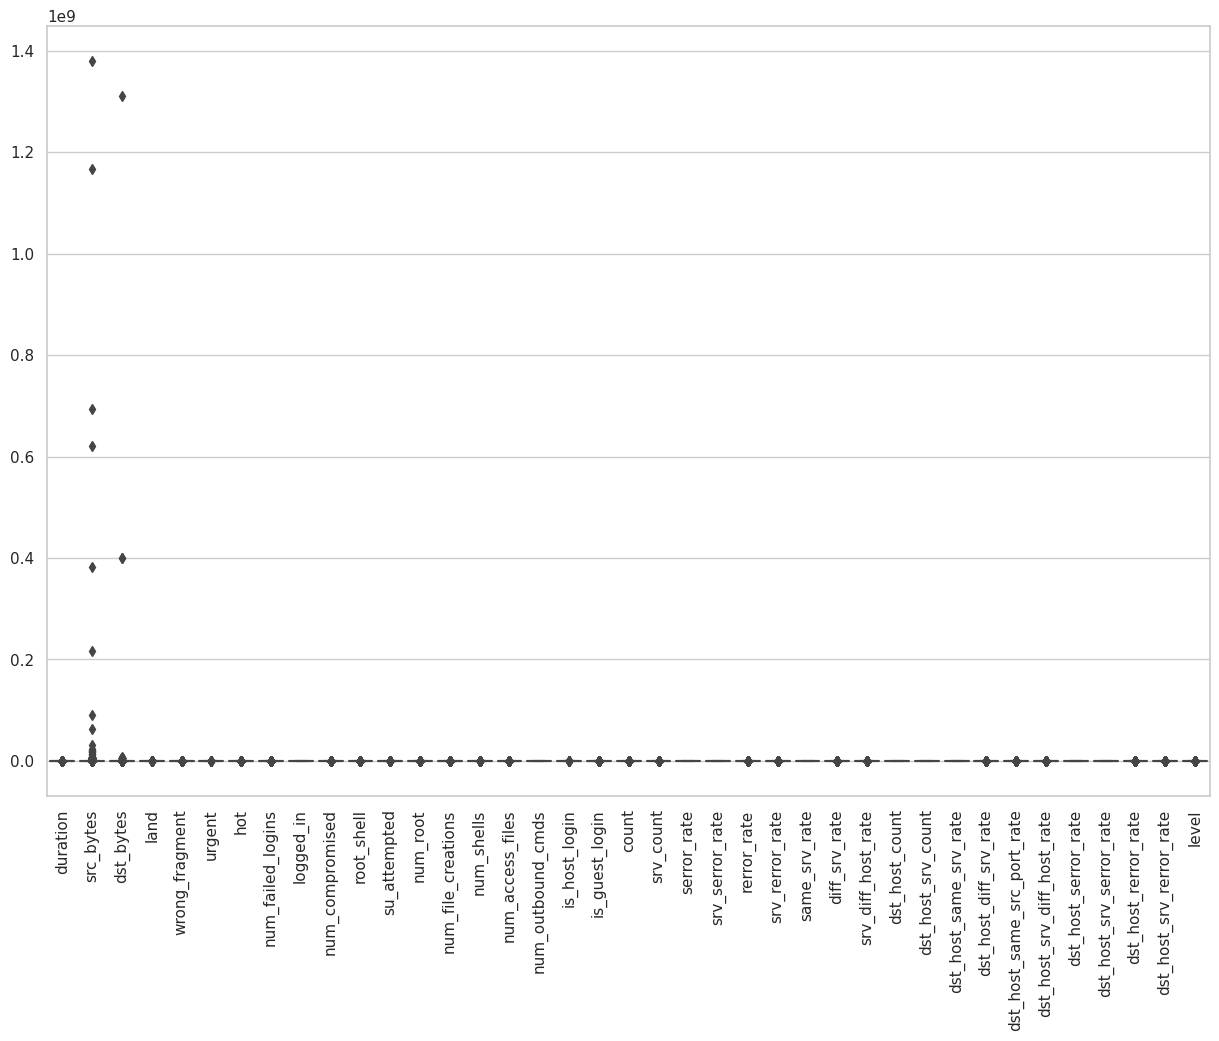

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate and display the distribution of class labels in the 'attack' column
# This provides insights into the proportion of each class in the dataset

classLabel_counts = df.groupby(['attack']).size()
classLabel_counts
per_classLabels = classLabel_counts/df.shape[0]*100
per_classLabels

attack
apache2             0.496239
back                0.885421
buffer_overflow     0.033666
ftp_write           0.007407
guess_passwd        0.864547
httptunnel          0.089552
imap                0.008080
ipsweep             2.518230
land                0.016833
loadmodule          0.007407
mailbomb            0.197284
mscan               0.670630
multihop            0.016833
named               0.011447
neptune            30.886027
nmap                1.054425
normal             51.882276
perl                0.003367
phf                 0.004040
pod                 0.162944
portsweep           2.079223
processtable        0.461227
ps                  0.010100
rootkit             0.015486
saint               0.214790
satan               2.941077
sendmail            0.009427
smurf               2.229374
snmpgetattack       0.119852
snmpguess           0.222870
spy                 0.001347
sqlattack           0.001347
teardrop            0.608685
udpstorm            0.001347
warezcl

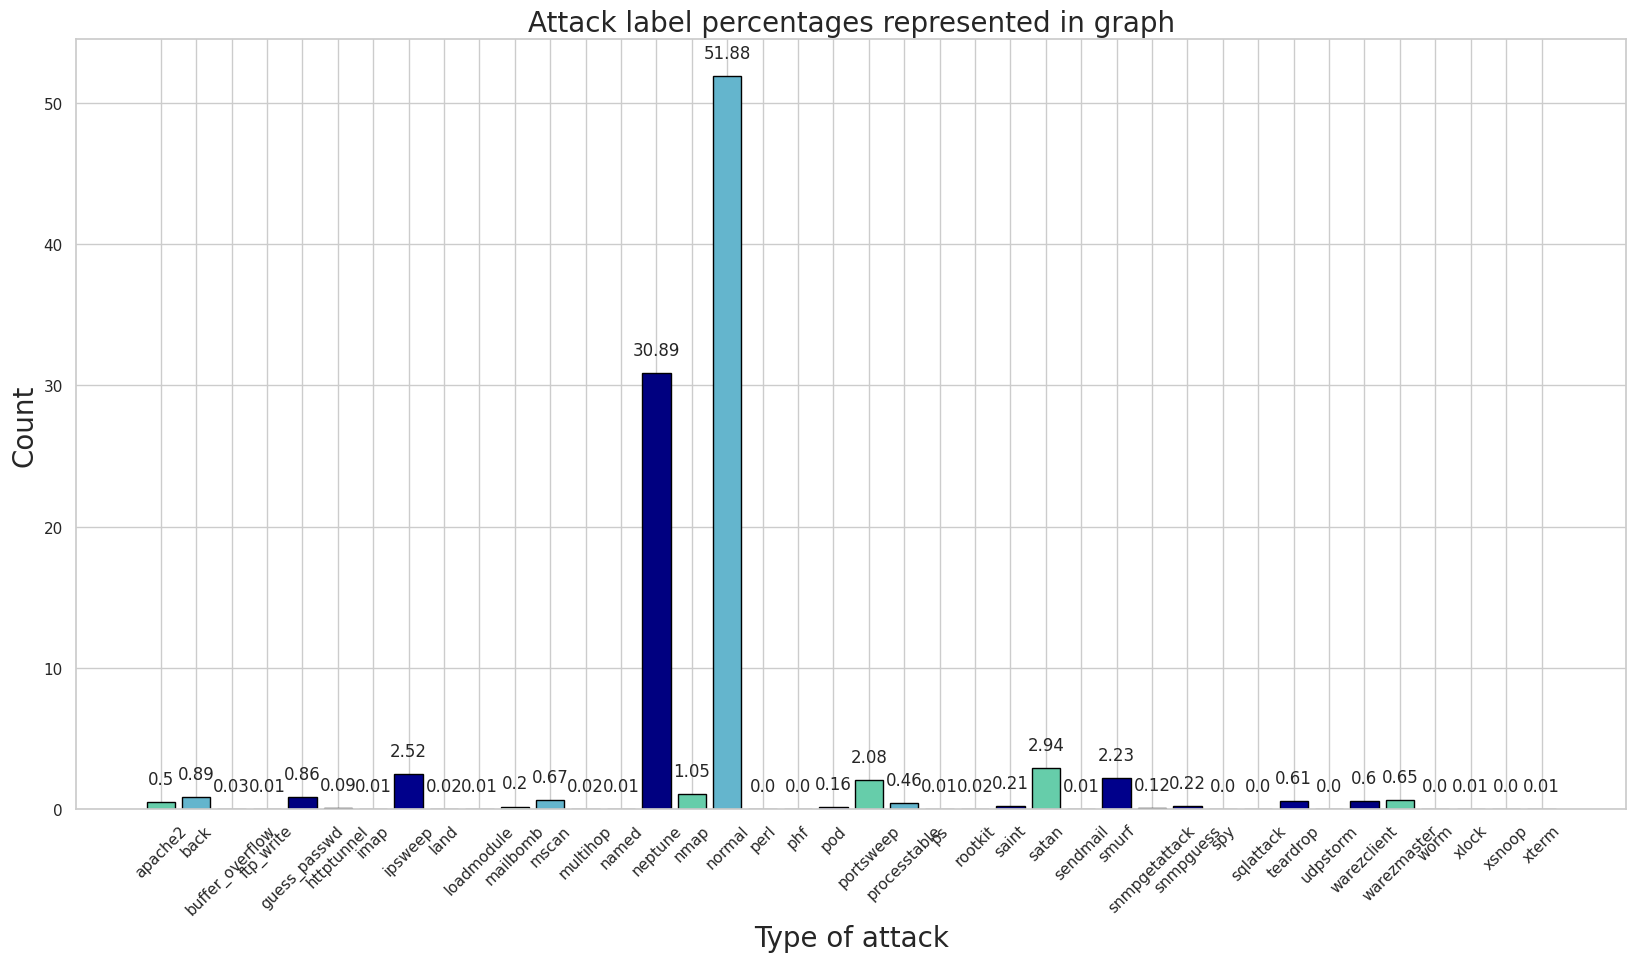

In [ ]:
# Visualize the distribution of class labels in the 'attack' column by creating a bar plot.

fig = plt.figure(figsize = (20,10))
r_ = [round(each, 2) for each in per_classLabels.values]
ax = fig.add_subplot(111)
ax.bar(per_classLabels.index, per_classLabels.values, color = ["mediumaquamarine", 'c', 'darkblue', 'tomato', 'navy'], edgecolor = 'black')

# Rotate x-axis labels for better visibility
ax.set_xticklabels(per_classLabels.index, rotation = 45)

# Set labels and title
ax.set_xlabel("Type of attack", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attack label percentages represented in graph", fontsize = 20)

# Annotate each bar with its rounded percentage value
for i in range(len(per_classLabels.values)):
    plt.annotate(str(r_[i]), xy=(per_classLabels.index[i],r_[i]+1), ha='center', va='bottom')

#display the plot
plt.show()

In [ ]:
#this function helps to classify different class labels into attack_types
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

In [ ]:
df['attack_type'] = df['attack'].apply(encode_attack)
df.iloc[:10, -5:]

,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_type
0,0.05,0.00,normal,20,normal
1,0.00,0.00,normal,15,normal
2,0.00,0.00,neptune,19,Dos
3,0.00,0.01,normal,21,normal
4,0.00,0.00,normal,21,normal
5,1.00,1.00,neptune,21,Dos
6,0.00,0.00,neptune,21,Dos
7,0.00,0.00,neptune,21,Dos
8,0.00,0.00,neptune,21,Dos
9,0.00,0.00,neptune,21,Dos


In [ ]:
df.groupby('attack_type').size()

attack_type
Dos       51668
Probe     12762
R2L        6944
U2R          89
normal    77054
dtype: int64

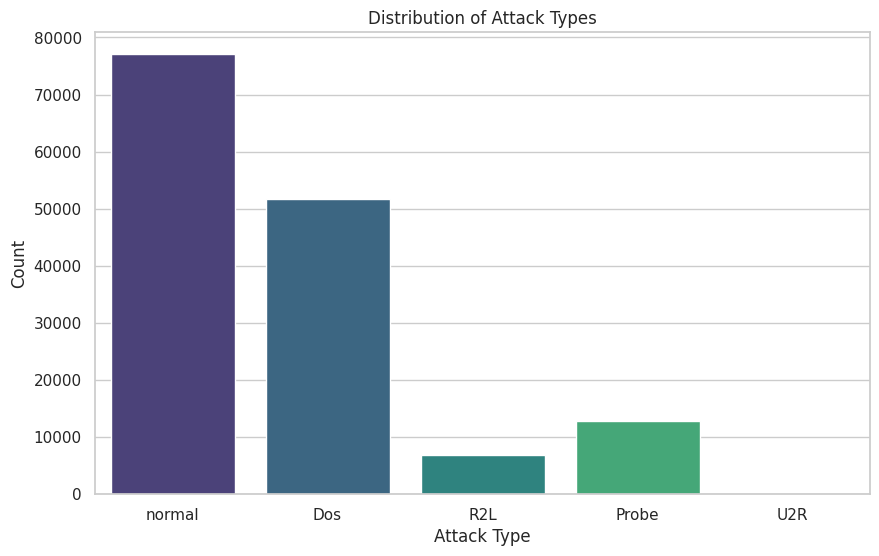

In [ ]:
# Plot the distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(x='attack_type', data=df, palette='viridis')
plt.xticks(ticks=range(5))
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Distribution of Attack Types')
plt.show()

In [ ]:
fig = px.pie(
    df,
    values=df['attack_type'].value_counts(),
    names=df['attack_type'].unique(),
    title='Different types of attack types in data',
    width = 500,
    height = 500)
fig.show()

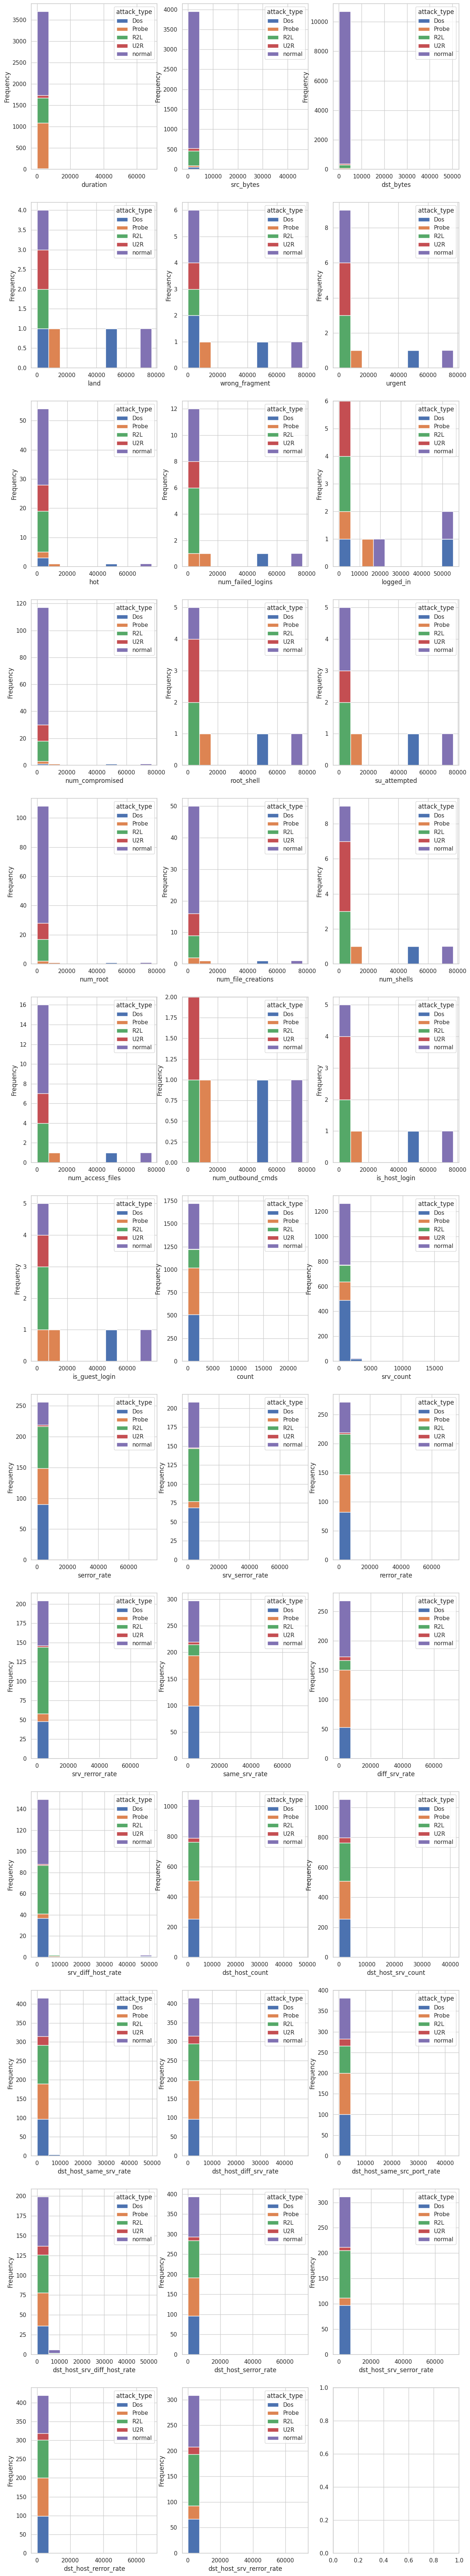

In [ ]:
c = len(df.select_dtypes(include=["number"]).columns)

cols = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

def create_plot_pivot(df, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = df.groupby([x_column, 'attack_type']).size() \
    .reset_index().pivot(columns='attack_type', index=x_column, values=0)
    return _df_plot

fig, ax = plt.subplots(13, 3, figsize=(15, 90))
axe = ax.ravel()

for i, col in enumerate(cols):
    if i >= c:
        break  # Break out of the loop if we reach the end of cols
    create_plot_pivot(df, col).plot(kind='hist', stacked=True, ax=axe[i])
    axe[i].set_xlabel(col)

fig.show()

In [ ]:
# Converting features from "object" to "category" type enhances memory efficiency, processing speed, and model performance in machine learning by optimizing data representation.
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

In [ ]:

is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['class'] = is_attack.apply(lambda x: 'normal' if x == 0 else 'anomaly')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_type,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,normal


In [ ]:
fig = px.pie(df, values=df['class'].value_counts(), names=df['class'].unique(), title='class',width = 500, height = 500)
fig.show()

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

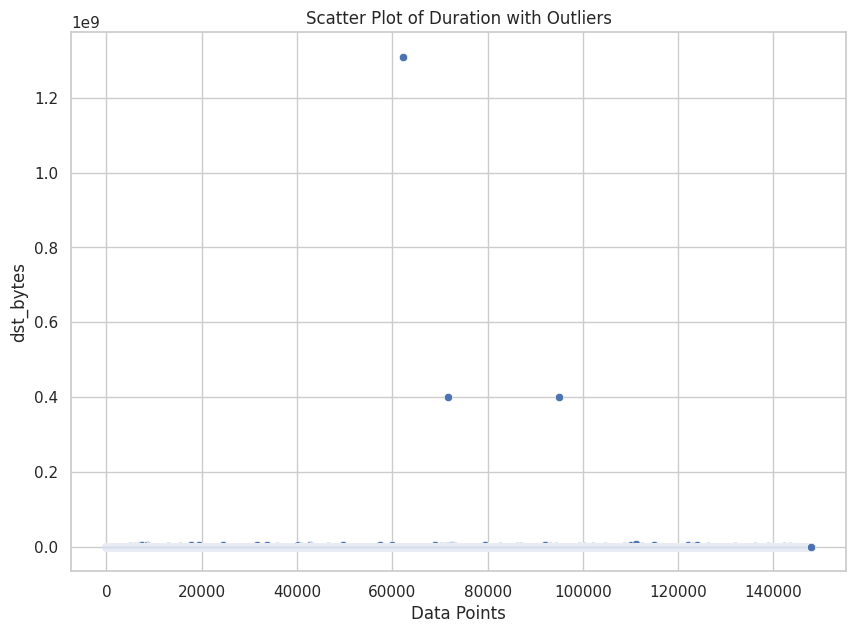

In [ ]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 7))
sns.scatterplot(x=np.arange(len(df['dst_bytes'])), y=df['dst_bytes'])
plt.title('Scatter Plot of Duration with Outliers')
plt.xlabel('Data Points')
plt.ylabel('dst_bytes')
plt.show()

In [ ]:
# Filter rows where 'dst_bytes' is greater than 100000
high_dst_bytes_rows = df[df['dst_bytes'] > 100000]

# Count of rows
count_high_dst_bytes = len(high_dst_bytes_rows)

# Percentage of rows
percentage_high_dst_bytes = (count_high_dst_bytes / len(df)) * 100

# Display the count and percentage
print("Count of rows with dst_bytes > 100000:", count_high_dst_bytes)
print("Percentage of rows with dst_bytes > 100000:", percentage_high_dst_bytes, "%")

Count of rows with dst_bytes > 100000: 246
Percentage of rows with dst_bytes > 100000: 0.16632072856592317 %


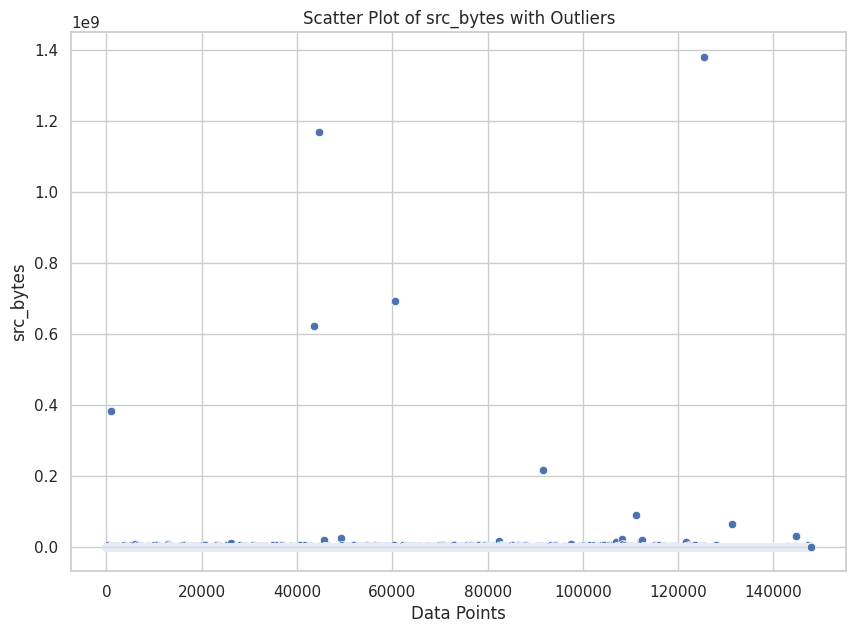

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=np.arange(len(df['src_bytes'])), y=df['src_bytes'])
plt.title('Scatter Plot of src_bytes with Outliers')
plt.xlabel('Data Points')
plt.ylabel('src_bytes')
plt.show()

In [ ]:
# Filter rows where 'dst_bytes' is greater than 100000
high_src_bytes_rows = df[df['src_bytes'] > 100000]

# Count of rows
count_high_src_bytes = len(high_src_bytes_rows)

# Percentage of rows
percentage_high_src_bytes = (count_high_src_bytes / len(df)) * 100

# Display the count and percentage
print("Count of rows with dst_bytes > 100000:", count_high_src_bytes)
print("Percentage of rows with dst_bytes > 100000:", percentage_high_src_bytes, "%")

Count of rows with dst_bytes > 100000: 770
Percentage of rows with dst_bytes > 100000: 0.5205974024217921 %


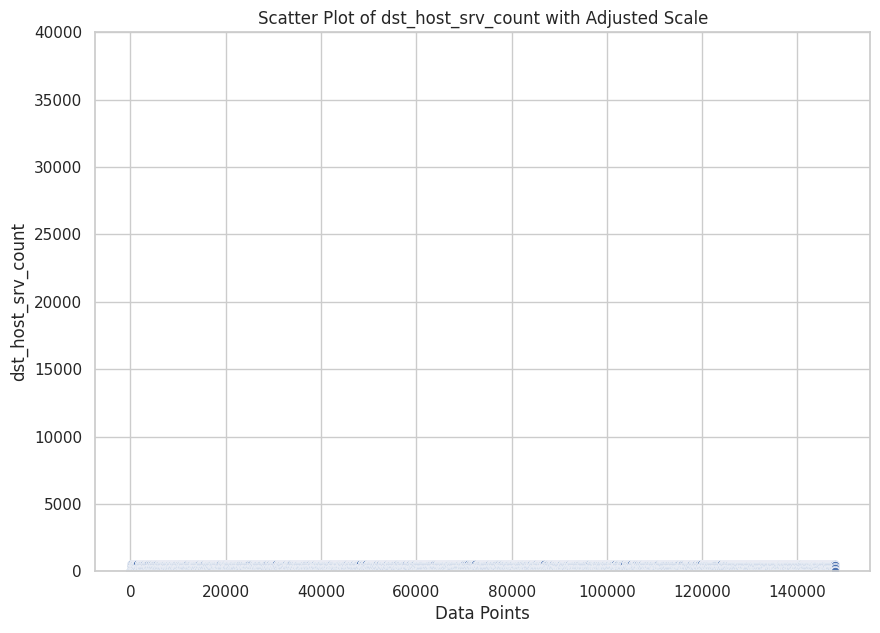

In [ ]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 7))
sns.scatterplot(x=np.arange(len(df['count'])), y=df['count'])
plt.title('Scatter Plot of dst_host_srv_count with Adjusted Scale')
plt.xlabel('Data Points')
plt.ylabel('dst_host_srv_count')
plt.ylim(0, 40000)  # Adjust the y-axis limits
plt.show()


In [ ]:
# Filter rows where 'dst_bytes' or 'src_bytes' is greater than 100000
df = df[(df['dst_bytes'] <= 100000) & (df['src_bytes'] <= 100000)]

In [ ]:
#dropping the attack_type column as in this lab we will only focus in the class column as our target label
df = df.drop(columns = ['attack_type'])

In [ ]:
df.shape

(146912, 44)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [ ]:
df = df.drop(['service', 'flag'], axis=1)

In [ ]:
df = df[df['protocol_type'] == 'tcp']

In [ ]:
df = df.drop(['protocol_type'], axis=1)

In [ ]:
df.drop('num_outbound_cmds',axis=1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,class
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,anomaly
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,1,2599,293,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,186,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,mailbomb,11,anomaly
148512,0,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148513,0,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148514,0,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,anomaly


In [ ]:
columns_to_remove = [
'hot',
'num_failed_logins',
'land',
'count',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login']

# Remove the columns from the DataFrame
df = df.drop(columns=columns_to_remove)

In [ ]:
class_mapping = {'normal': 0, 'anomaly': 1}
df['class'] = df['class'].map(class_mapping)
df.head(5)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,class
0,0,491,0,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
2,0,0,0,0,0,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,232,8153,0,0,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,199,420,0,0,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
5,0,0,0,0,0,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1


In [ ]:
df = df.drop(columns = ['attack','level'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

d_raw = df

# Apply Min-Max normalization to the DataFrame
d_norm = pd.DataFrame(scaler.fit_transform(d_raw), columns=d_raw.columns)

In [ ]:
d_norm.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,0.005266,0.000000,0.0,0.0,0.012270,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.036810,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0
2,0.0,0.002488,0.081664,0.0,0.0,0.030675,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0
3,0.0,0.002134,0.004207,0.0,0.0,0.196319,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.116564,0.0,0.0,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1.0


In [ ]:
d_norm['class'] = d_norm['class'].astype(int)

In [ ]:
d_norm.shape

(120366, 24)

In [ ]:
X_d_norm = d_norm.drop(columns = 'class')
y = d_norm['class']

In [ ]:
X_d_raw = d_raw.drop(columns = 'class')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=23)  # Retain 95% of variance
X_d_norm_pca = pca.fit_transform(X_d_norm)

In [ ]:
# Convert the PCA results to a DataFrame
columns = [f'PC{i+1}' for i in range(X_d_norm_pca.shape[1])]
X_d_norm_pca = pd.DataFrame(data=X_d_norm_pca, columns=columns)

In [ ]:
X_d_norm_pca.shape

(120366, 23)

In [ ]:
y.shape

(120366,)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=23)  # Retain 95% of variance
X_d_raw_pca = pca.fit_transform(X_d_raw)

# Convert the PCA results to a DataFrame
columns = [f'PC{i+1}' for i in range(X_d_raw_pca.shape[1])]
X_d_raw_pca = pd.DataFrame(data=X_d_raw_pca, columns=columns)

X_d_raw_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-996.856994,-1628.046448,-264.618671,38.218429,78.373891,-4.356236,-0.308434,1.074463,-0.101779,-0.054552,-0.102955,-0.083661,0.107307,-0.080187,0.116729,0.061368,0.015325,-0.034164,0.006543,-0.020757,0.000078,-0.001170,-4.044941e-17
1,-1483.595076,-1563.608170,-264.192421,100.362274,-6.447149,-3.205314,1.011832,-0.303465,-0.010116,-0.000506,-0.045313,0.048372,-0.002001,0.006511,-0.018501,-0.010008,-0.001420,0.007889,-0.001185,0.001396,0.000265,0.000219,-5.766239e-17
2,-176.610074,6489.513833,-281.488548,-153.507068,44.263596,-3.779315,0.425043,-0.398591,-0.139357,0.059029,-0.070908,-0.092553,0.007118,0.005667,0.120900,-0.081728,0.048027,-0.012924,0.037967,0.018111,0.007079,-0.000848,1.013032e-16
3,-1230.482284,-1172.027980,-265.926155,-79.181610,-144.676309,16.129782,-0.373233,0.407304,0.002112,0.007743,0.070229,0.021579,-0.039656,0.015245,-0.021405,-0.011068,0.005154,0.012751,-0.000428,0.000800,0.000102,0.000619,1.414003e-13
4,-1483.606809,-1563.655939,-264.171238,105.853134,-2.744241,9.947307,-2.004694,-0.261465,0.002481,-0.104991,-0.241432,0.044149,0.066776,0.022326,0.020614,0.011449,-0.000364,-0.011589,0.000740,-0.001141,0.001335,-0.000043,-1.275687e-18


In [ ]:
X_d_norm_train, X_d_norm_test, y_d_norm_train, y_d_norm_test = train_test_split(X_d_norm, y, test_size=0.2,random_state=42)

In [ ]:
X_d_norm_pca_train, X_d_norm_pca_test, y_d_norm_pca_train, y_d_norm_pca_test = train_test_split(X_d_norm_pca, y, test_size=0.2,random_state=42)

In [ ]:
X_d_raw_train, X_d_raw_test, y_d_raw_train, y_d_raw_test = train_test_split(X_d_raw, y, test_size=0.2,random_state=42)

In [ ]:
X_d_raw_pca_train, X_d_raw_pca_test, y_d_raw_pca_train, y_d_raw_pca_test = train_test_split(X_d_raw_pca, y, test_size=0.2,random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

# Assuming d_norm, d_norm_pca, d_raw, d_raw_pca are dictionaries containing the datasets
datasets = {
    'd_norm': {'train': (X_d_norm_train, y_d_norm_train), 'test': (X_d_norm_test, y_d_norm_test)},
    'd_norm_pca': {'train': (X_d_norm_pca_train, y_d_norm_pca_train), 'test': (X_d_norm_pca_test, y_d_norm_pca_test)},
    'd_raw': {'train': (X_d_raw_train, y_d_raw_train), 'test': (X_d_raw_test, y_d_raw_test)},
    'd_raw_pca': {'train': (X_d_raw_pca_train, y_d_raw_pca_train), 'test': (X_d_raw_pca_test, y_d_raw_pca_test)},
}

# Dictionary to store evaluation metrics
probs = {}

for dataset_name, dataset_info in datasets.items():
    # Extract data
    X_train, y_train = dataset_info['train']
    X_test, y_test = dataset_info['test']

    # Initialize lists to hold the probabilities for each feature
    train_probs = []
    test_probs = []

    # Loop through each feature and fit a separate GaussianMixture
    for feature_idx in range(X_train.shape[1]):
        # Fit a GaussianMixture model to the current feature column
        gmm_feature = GaussianMixture(n_components=2, random_state=42)
        # Identify indices of normal samples
        normal_indices = X_train.index[y_train == 0]
        # Select normal samples using loc and isin
        normal_samples = X_train.loc[normal_indices]
        normal_samples_array =normal_samples.values
        X_train_array = X_train.values
        X_test_array = X_test.values

        # Reshape the column vector to a 2D array for sklearn compatibility
        gmm_feature.fit(normal_samples_array[:, feature_idx].reshape(-1, 1))

        # Compute the log-likelihood of the training data for the current feature
        train_feature_log_likelihood = gmm_feature.score_samples(X_train_array[:, feature_idx].reshape(-1, 1))
        train_feature_prob = np.exp(train_feature_log_likelihood - np.max(train_feature_log_likelihood))
        train_feature_prob /= np.sum(np.exp(train_feature_log_likelihood - np.max(train_feature_log_likelihood)))
        train_probs.append(train_feature_prob)

        # Compute the log-likelihood of the test data for the current feature
        test_feature_log_likelihood = gmm_feature.score_samples(X_test_array[:, feature_idx].reshape(-1, 1))
        test_feature_prob = np.exp(test_feature_log_likelihood - np.max(test_feature_log_likelihood))
        test_feature_prob /= np.sum(np.exp(test_feature_log_likelihood - np.max(test_feature_log_likelihood)))
        test_probs.append(test_feature_prob)

    # Convert the lists of probabilities into DataFrames
    X_train_probs = pd.DataFrame(np.column_stack(train_probs),
                                 columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
    X_test_probs = pd.DataFrame(np.column_stack(test_probs),
                                columns=[f"Feature_{i}" for i in range(X_train.shape[1])])

    # Save the results in the dictionary
    probs[dataset_name + '_probs'] = {
        'X_train_probs': X_train_probs,
        'X_test_probs': X_test_probs,
        'y_train': y_train,
        'y_test': y_test,
    }

# Access the results like this:
X_d_norm_probs_train = probs['d_norm_probs']['X_train_probs']
X_d_norm_probs_test = probs['d_norm_probs']['X_test_probs']

X_d_norm_pca_probs_train = probs['d_norm_pca_probs']['X_train_probs']
X_d_norm_pca_probs_test = probs['d_norm_pca_probs']['X_test_probs']

X_d_raw_probs_train = probs['d_raw_probs']['X_train_probs']
X_d_raw_probs_test = probs['d_raw_probs']['X_test_probs']

X_d_raw_pca_probs_train = probs['d_raw_pca_probs']['X_train_probs']
X_d_raw_pca_probs_test = probs['d_raw_pca_probs']['X_test_probs']

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, recall_score

# Assuming datasets is a dictionary as mentioned in the question
datasets = {
    "d_norm_probs": (X_d_norm_probs_train, X_d_norm_probs_test, y_d_norm_train, y_d_norm_test),
    "d_norm_pca_probs": (X_d_norm_pca_probs_train, X_d_norm_pca_probs_test, y_d_norm_pca_train, y_d_norm_pca_test),
    "d_raw_probs": (X_d_raw_probs_train, X_d_raw_probs_test, y_d_raw_train, y_d_raw_test),
    "d_raw_pca_probs": (X_d_raw_pca_probs_train, X_d_raw_pca_probs_test, y_d_raw_pca_train, y_d_raw_pca_test)
}

# Parameters
alpha = 0.01  # Individual feature probability threshold
consensus = 0.01  # Minimum number of anomalous features to consider the whole vector as an attack

# Dictionary to store evaluation metrics
voting_evaluation_metrics = {}

for dataset_name, dataset_info in datasets.items():
    # Extract data
    X_train_probs, X_test_probs, y_train, y_test = dataset_info

    # Calculate the decision threshold based on the training data
    threshold = np.percentile(X_train_probs.max(axis=1), (1 - alpha) * 100)

    # Apply Weighted Probability Voting Scheme on the test set
    weighted_votes_test = (X_test_probs > threshold).astype(float)
    consensus_test = weighted_votes_test.sum(axis=1) / X_train_probs.shape[1]

    # Make predictions on the test set using the consensus threshold
    final_test_predictions = (consensus_test >= consensus).astype(int)

    # Calculate F1 and sensitivity (recall) scores for the predictions

    f1_test = f1_score(y_test, final_test_predictions)
    sensitivity_test = recall_score(y_test, final_test_predictions)

    ppv = precision_score(y_test, final_test_predictions)
    tn, fp, fn, tp = confusion_matrix(y_test, final_test_predictions).ravel()
    npv = tn / (tn + fn)

    B = np.mean(y_test)
    cap = (ppv * (1 - B)) / ((1 - ppv) * B + sensitivity_test)

    # Save the results in the dictionary
    voting_evaluation_metrics[dataset_name] = {
        'f1_test': f1_test,
        'sensitivity_test': sensitivity_test,
        'y_test': y_test,
        'CAP': cap
    }



    # Print the results
    print(f"{dataset_name} - F1 Score (Test): {f1_test}")
    print(f"{dataset_name} - Sensitivity (Test): {sensitivity_test}")
    print(f"{dataset_name} - CAP (Test): {cap}")
    print()


d_norm_probs - F1 Score (Test): 0.6590915420391568
d_norm_probs - Sensitivity (Test): 1.0
d_norm_probs - CAP (Test): 0.19995404119315102

d_norm_pca_probs - F1 Score (Test): 0.5323675234712895
d_norm_pca_probs - Sensitivity (Test): 0.639736330600862
d_norm_pca_probs - CAP (Test): 0.255504474632386

d_raw_probs - F1 Score (Test): 0.6590915420391568
d_raw_probs - Sensitivity (Test): 1.0
d_raw_probs - CAP (Test): 0.19995404119315102

d_raw_pca_probs - F1 Score (Test): 0.540555624457398
d_raw_pca_probs - Sensitivity (Test): 0.7366686385531986
d_raw_pca_probs - CAP (Test): 0.21315731674468436



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

# Assuming y_train and y_test are binary, with the positive class (e.g., attacks) labeled as 1

# Define your datasets
datasets = {
    "d_norm": (X_d_norm_train, X_d_norm_test,y_d_norm_train,y_d_norm_test),
    "d_norm_pca": (X_d_norm_pca_train, X_d_norm_pca_test,y_d_norm_pca_train,y_d_norm_pca_test),
    "d_raw": (X_d_raw_train, X_d_raw_test,y_d_raw_train,y_d_raw_test),
    "d_raw_pca": (X_d_raw_pca_train, X_d_raw_pca_test,y_d_raw_pca_train,y_d_raw_pca_test),
    "d_norm_probs": (X_d_norm_probs_train, X_d_norm_probs_test,y_d_norm_train,y_d_norm_test),
    "d_norm_pca_probs": (X_d_norm_pca_probs_train, X_d_norm_pca_probs_test,y_d_norm_pca_train,y_d_norm_pca_test),
    "d_raw_probs": (X_d_raw_probs_train, X_d_raw_probs_test,y_d_raw_train,y_d_raw_test),
    "d_raw_pca_probs": (X_d_raw_pca_probs_train, X_d_raw_pca_probs_test,y_d_raw_pca_train,y_d_raw_pca_test)
}

# Initialize dictionary to store evaluation metrics for all datasets
kmeans_evaluation_metrics = {}

for dataset_name, (X_train, X_test,y_train,y_test) in datasets.items():
    # Apply k-means clustering with 2 clusters (assuming binary classification)
    kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

    # Predicted clusters on the training and test sets
    train_clusters = kmeans.predict(X_train)
    test_clusters = kmeans.predict(X_test)

    # Determine which cluster label corresponds to the positive class
    # This assumes the majority class in a cluster is the class for the entire cluster
    cluster_label_map = {
        0: np.argmax(np.bincount(y_train[train_clusters == 0])),
        1: np.argmax(np.bincount(y_train[train_clusters == 1]))


    }

    # Map the clusters to actual class labels
    predicted_train = np.array([cluster_label_map[label] for label in train_clusters])
    predicted_test = np.array([cluster_label_map[label] for label in test_clusters])

    # Calculate evaluation metrics
    f1 = f1_score(y_test, predicted_test)
    sensitivity = recall_score(y_test, predicted_test)
    ppv = precision_score(y_test, predicted_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_test).ravel()
    npv = tn / (tn + fn)

    B = np.mean(y_test)
    cap = (ppv * (1 - B)) / ((1 - ppv) * B + sensitivity)

    # Save evaluation metrics
    kmeans_evaluation_metrics[dataset_name] = {
        'f1': f1,
        'sensitivity': sensitivity,
        'ppv': ppv,
        'npv': npv,
        'B': B,
        'CAP': cap
    }

# Print out the metrics for each dataset
for dataset_name, metrics in kmeans_evaluation_metrics.items():
    print(f"K-means Metrics for {dataset_name}:")
    print(f"- F1 Score: {metrics['f1']}")
    print(f"- Sensitivity: {metrics['sensitivity']}")
    print(f"- Intrusion Detection Capacity (CAP): {metrics['CAP']}\n")

K-means Metrics for d_norm:
- F1 Score: 0.7659176029962547
- Sensitivity: 0.6221583706583284
- Intrusion Detection Capacity (CAP): 0.811551601666645

K-means Metrics for d_norm_pca:
- F1 Score: 0.7659176029962547
- Sensitivity: 0.6221583706583284
- Intrusion Detection Capacity (CAP): 0.811551601666645

K-means Metrics for d_raw:
- F1 Score: 0.05235945835043086
- Sensitivity: 0.026958505873404884
- Intrusion Detection Capacity (CAP): 6.309012168343504

K-means Metrics for d_raw_pca:
- F1 Score: 0.05235945835043086
- Sensitivity: 0.026958505873404884
- Intrusion Detection Capacity (CAP): 6.309012168343504

K-means Metrics for d_norm_probs:
- F1 Score: 0.9054428253665623
- Sensitivity: 0.8428124735908054
- Intrusion Detection Capacity (CAP): 0.5826787161822692

K-means Metrics for d_norm_pca_probs:
- F1 Score: 0.25525189331577214
- Sensitivity: 0.16377926138764473
- Intrusion Detection Capacity (CAP): 0.7921363253310054

K-means Metrics for d_raw_probs:
- F1 Score: 0.9143600556278317
- Se

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

# Initialize dictionary to store evaluation metrics for all datasets
svm_evaluation_metrics = {}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    # Apply SVM
    svm_model = SVC(random_state=0)
    svm_model.fit(X_train, y_train)

    # Predicted labels on the test set
    predicted_test = svm_model.predict(X_test)

    # Calculate evaluation metrics
    f1 = f1_score(y_test, predicted_test)
    sensitivity = recall_score(y_test, predicted_test)
    ppv = precision_score(y_test, predicted_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_test).ravel()
    npv = tn / (tn + fn)

    B = np.mean(y_test)
    cap = (ppv * (1 - B)) / ((1 - ppv) * B + sensitivity)

    # Save evaluation metrics
    svm_evaluation_metrics[dataset_name] = {
        'f1': f1,
        'sensitivity': sensitivity,
        'ppv': ppv,
        'npv': npv,
        'B': B,
        'CAP': cap
    }

# Print out the metrics for each dataset
for dataset_name, metrics in svm_evaluation_metrics.items():
    print(f"SVM Metrics for {dataset_name} using SVM:")
    print(f"- F1 Score: {metrics['f1']}")
    print(f"- Sensitivity: {metrics['sensitivity']}")
    print(f"- Intrusion Detection Capacity (CAP): {metrics['CAP']}\n")


SVM Metrics for d_norm using SVM:
- F1 Score: 0.9758130343257293
- Sensitivity: 0.9597735147468943
- Intrusion Detection Capacity (CAP): 0.5237187178937526

SVM Metrics for d_norm_pca using SVM:
- F1 Score: 0.9770336982185018
- Sensitivity: 0.961717231471309
- Intrusion Detection Capacity (CAP): 0.5230197004425812

SVM Metrics for d_raw using SVM:
- F1 Score: 0.949698189134809
- Sensitivity: 0.9573227414856756
- Intrusion Detection Capacity (CAP): 0.4860136744240984

SVM Metrics for d_raw_pca using SVM:
- F1 Score: 0.9497820254862509
- Sensitivity: 0.9574072509084763
- Intrusion Detection Capacity (CAP): 0.4860350669511356

SVM Metrics for d_norm_probs using SVM:
- F1 Score: 0.0
- Sensitivity: 0.0
- Intrusion Detection Capacity (CAP): 0.0

SVM Metrics for d_norm_pca_probs using SVM:
- F1 Score: 0.6590915420391568
- Sensitivity: 1.0
- Intrusion Detection Capacity (CAP): 0.19995404119315102

SVM Metrics for d_raw_probs using SVM:
- F1 Score: 0.0
- Sensitivity: 0.0
- Intrusion Detection C

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    ppv = precision_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    npv = tn / (tn + fn)

    B = np.mean(y_true)
    cap = (ppv * (1 - B)) / ((1 - ppv) * B + sensitivity)

    return {
        'f1': f1,
        'sensitivity': sensitivity,
        'ppv': ppv,
        'npv': npv,
        'B': B,
        'CAP': cap
    }

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

# Initialize dictionary to store evaluation metrics for all datasets
evaluation_metrics_mlp = {}

# MLP with a hidden layer of 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    # Fit the MLP model
    mlp.fit(X_train, y_train)

    # Predictions on the test set
    predicted_test = mlp.predict(X_test)

    # Calculate evaluation metrics
    metrics = calculate_metrics(y_test, predicted_test)

    # Save evaluation metrics
    evaluation_metrics_mlp[dataset_name] = metrics

# Print out the metrics for each dataset
for dataset_name, metrics in evaluation_metrics_mlp.items():
    print(f"MLP Metrics for {dataset_name}:")
    print(f"- F1 Score: {metrics['f1']}")
    print(f"- Sensitivity: {metrics['sensitivity']}")
    print(f"- Intrusion Detection Capacity (CAP): {metrics['CAP']}\n")

MLP Metrics for d_norm:
- F1 Score: 0.9912351272388533
- Sensitivity: 0.9891827938815178
- Intrusion Detection Capacity (CAP): 0.5088929597228186

MLP Metrics for d_norm_pca:
- F1 Score: 0.990085585967291
- Sensitivity: 0.9874080960027043
- Intrusion Detection Capacity (CAP): 0.5094075126633973

MLP Metrics for d_raw:
- F1 Score: 0.9872236698327309
- Sensitivity: 0.9925631707935435
- Intrusion Detection Capacity (CAP): 0.4985738082403869

MLP Metrics for d_raw_pca:
- F1 Score: 0.9790882475951485
- Sensitivity: 0.9891827938815178
- Intrusion Detection Capacity (CAP): 0.4906904487738899

MLP Metrics for d_norm_probs:
- F1 Score: 0.8525385160592381
- Sensitivity: 0.9656891743429392
- Intrusion Detection Capacity (CAP): 0.35858110589518416

MLP Metrics for d_norm_pca_probs:
- F1 Score: 0.6590915420391568
- Sensitivity: 1.0
- Intrusion Detection Capacity (CAP): 0.19995404119315102

MLP Metrics for d_raw_probs:
- F1 Score: 0.768278087110371
- Sensitivity: 0.6238485591143412
- Intrusion Detec

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize dictionary to store evaluation metrics for all datasets
evaluation_metrics_dt = {}

# Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    # Fit the Decision Tree model
    dt.fit(X_train, y_train)

    # Predictions on the test set
    predicted_test = dt.predict(X_test)

    # Calculate evaluation metrics
    metrics = calculate_metrics(y_test, predicted_test)

    # Save evaluation metrics
    evaluation_metrics_dt[dataset_name] = metrics

# Print out the metrics for each dataset
for dataset_name, metrics in evaluation_metrics_dt.items():
    print(f"Decision Tree Metrics for {dataset_name}:")
    print(f"- F1 Score: {metrics['f1']}")
    print(f"- Sensitivity: {metrics['sensitivity']}")
    print(f"- Intrusion Detection Capacity (CAP): {metrics['CAP']}\n")


Decision Tree Metrics for d_norm:
- F1 Score: 0.9953543373595742
- Sensitivity: 0.9958590382827686
- Intrusion Detection Capacity (CAP): 0.5066708822480513

Decision Tree Metrics for d_norm_pca:
- F1 Score: 0.9892019571452675
- Sensitivity: 0.9909574917603313
- Intrusion Detection Capacity (CAP): 0.5035416203184502

Decision Tree Metrics for d_raw:
- F1 Score: 0.9953543373595742
- Sensitivity: 0.9958590382827686
- Intrusion Detection Capacity (CAP): 0.5066708822480513

Decision Tree Metrics for d_raw_pca:
- F1 Score: 0.993034741863312
- Sensitivity: 0.9939998309811544
- Intrusion Detection Capacity (CAP): 0.5055055869092673

Decision Tree Metrics for d_norm_probs:
- F1 Score: 0.7958370680211135
- Sensitivity: 0.6753147975999324
- Intrusion Detection Capacity (CAP): 0.7131592890280319

Decision Tree Metrics for d_norm_pca_probs:
- F1 Score: 0.827235693501455
- Sensitivity: 0.9009549564776472
- Intrusion Detection Capacity (CAP): 0.382454645715944

Decision Tree Metrics for d_raw_probs:


In [ ]:
import pandas as pd

# Create dataframes to store evaluation metrics
f1df = pd.DataFrame(index=datasets.keys(), columns=['Voting', 'KMeans', 'SVM', 'MLP', 'DecisionTree'])
sdf = pd.DataFrame(index=datasets.keys(), columns=['Voting', 'KMeans', 'SVM', 'MLP', 'DecisionTree'])
capdf = pd.DataFrame(index=datasets.keys(), columns=['Voting', 'KMeans', 'SVM', 'MLP', 'DecisionTree'])

# Voting Scheme
for dataset_name, metrics in voting_evaluation_metrics.items():
    f1df.at[dataset_name, 'Voting'] = metrics['f1_test']
    sdf.at[dataset_name, 'Voting'] = metrics['sensitivity_test']
    capdf.at[dataset_name, 'Voting'] = metrics['CAP']

# KMeans
for dataset_name, metrics in kmeans_evaluation_metrics.items():
    f1df.at[dataset_name, 'KMeans'] = metrics['f1']
    sdf.at[dataset_name, 'KMeans'] = metrics['sensitivity']
    capdf.at[dataset_name, 'KMeans'] = metrics['CAP']

# SVM
for dataset_name, metrics in svm_evaluation_metrics.items():
    f1df.at[dataset_name, 'SVM'] = metrics['f1']
    sdf.at[dataset_name, 'SVM'] = metrics['sensitivity']
    capdf.at[dataset_name, 'SVM'] = metrics['CAP']

# MLP
for dataset_name, metrics in evaluation_metrics_mlp.items():
    f1df.at[dataset_name, 'MLP'] = metrics['f1']
    sdf.at[dataset_name, 'MLP'] = metrics['sensitivity']
    capdf.at[dataset_name, 'MLP'] = metrics['CAP']

# Decision Tree
for dataset_name, metrics in evaluation_metrics_dt.items():
    f1df.at[dataset_name, 'DecisionTree'] = metrics['f1']
    sdf.at[dataset_name, 'DecisionTree'] = metrics['sensitivity']
    capdf.at[dataset_name, 'DecisionTree'] = metrics['CAP']

# Print the dataframes
print("F1 Dataframe:")
print(f1df)

print("\nSensitivity Dataframe:")
print(sdf)

print("\nCAP Dataframe:")
print(capdf)


F1 Dataframe:
                    Voting    KMeans       SVM       MLP DecisionTree
d_norm                 NaN  0.765918  0.975813  0.991235     0.995354
d_norm_pca             NaN  0.765918  0.977034  0.990086     0.989202
d_raw                  NaN  0.052359  0.949698  0.987224     0.995354
d_raw_pca              NaN  0.052359  0.949782  0.979088     0.993035
d_norm_probs      0.659092  0.905443       0.0  0.852539     0.795837
d_norm_pca_probs  0.532368  0.255252  0.659092  0.659092     0.827236
d_raw_probs       0.659092   0.91436       0.0  0.768278     0.436932
d_raw_pca_probs   0.540556  0.273368       0.0  0.659092     0.121959

Sensitivity Dataframe:
                    Voting    KMeans       SVM       MLP DecisionTree
d_norm                 NaN  0.622158  0.959774  0.989183     0.995859
d_norm_pca             NaN  0.622158  0.961717  0.987408     0.990957
d_raw                  NaN  0.026959  0.957323  0.992563     0.995859
d_raw_pca              NaN  0.026959  0.957407  0.98

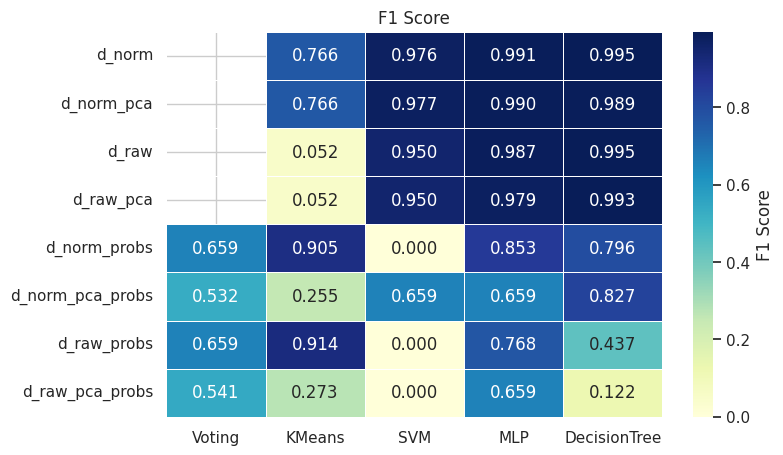

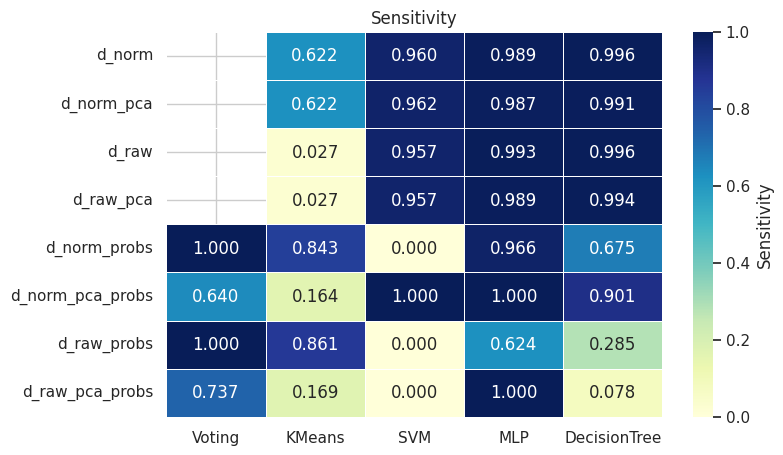

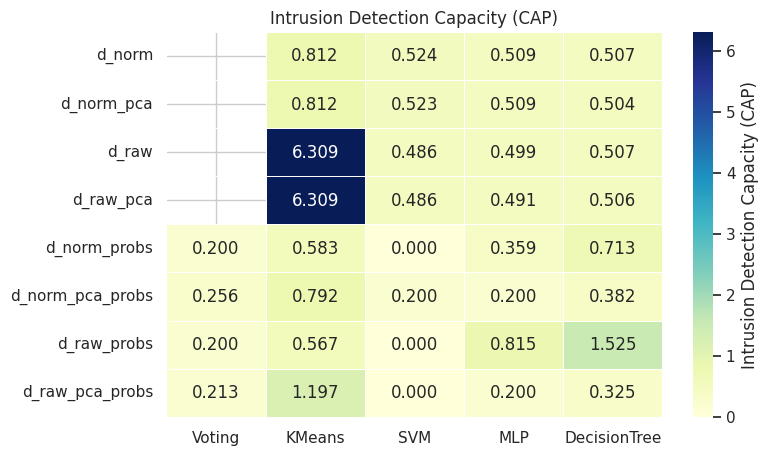

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Function to create heatmap
def create_heatmap(dataframe, title):
    plt.figure(figsize=(8, 5))

    # Convert each column to numeric
    numeric_df = dataframe.apply(pd.to_numeric, errors='coerce')

    sns.heatmap(numeric_df, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5, cbar_kws={"label": title})
    plt.title(title)
    plt.show()


# Create heatmap for F1 dataframe
create_heatmap(f1df, "F1 Score")

# Create heatmap for Sensitivity dataframe
create_heatmap(sdf, "Sensitivity")

# Create heatmap for CAP dataframe
create_heatmap(capdf, "Intrusion Detection Capacity (CAP)")